# **TRABALHO T2**

Estudo Introdut√≥rio a Recomenda√ß√µes e ao Algoritmo K-Nearest Neighbors
Este notebook apresenta um estudo referente √† metodologias de recomenda√ß√£o de filmes a um determinado usu√°rio, seguindo diferentes heur√≠sticas para tal.
O dataset utilizado para este estudo pode ser encontrado no seguinte link do site GroupLens: https://grouplens.org/datasets/movielens/latest/.

***UTILIZE O MAIOR DATASET DISPON√çVEL NESTE LINK PARA FAZER O TRABALHO!***

In [ ]:
# Importando bibliotecas necess√°rias para o estudo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
# Lendo o dataset relacionado aos filmes
movies = pd.read_csv("dados/movies.csv")
movies

movieId                                              title  \
0            1                                   Toy Story (1995)   
1            2                                     Jumanji (1995)   
2            3                            Grumpier Old Men (1995)   
3            4                           Waiting to Exhale (1995)   
4            5                 Father of the Bride Part II (1995)   
...        ...                                                ...   
86532   288967               State of Siege: Temple Attack (2021)   
86533   288971                                 Ouija Japan (2021)   
86534   288975   The Men Who Made the Movies: Howard Hawks (1973)   
86535   288977                    Skinford: Death Sentence (2023)   
86536   288983  UNZIPPED: An Autopsy of American Inequality (2...   

                                            genres  
0      Adventure|Animation|Children|Comedy|Fantasy  
1                       Adventure|Children|Fantasy  
2                                   Comedy|Romance  
3                             Comedy|Drama|Romance  
4                                           Comedy  
...                                            ...  
86532                                 Action|Drama  
86533                                Action|Horror  
86534                                  Documentary  
86535                               Crime|Thriller  
86536                                  Documentary  

[86537 rows x 3 columns]

In [ ]:
# Transformando coluna movieID em √≠ndice
movies.set_index('movieId', inplace = True)
movies

title  \
movieId                                                      
1                                         Toy Story (1995)   
2                                           Jumanji (1995)   
3                                  Grumpier Old Men (1995)   
4                                 Waiting to Exhale (1995)   
5                       Father of the Bride Part II (1995)   
...                                                    ...   
288967                State of Siege: Temple Attack (2021)   
288971                                  Ouija Japan (2021)   
288975    The Men Who Made the Movies: Howard Hawks (1973)   
288977                     Skinford: Death Sentence (2023)   
288983   UNZIPPED: An Autopsy of American Inequality (2...   

                                              genres  
movieId                                               
1        Adventure|Animation|Children|Comedy|Fantasy  
2                         Adventure|Children|Fantasy  
3                                     Comedy|Romance  
4                               Comedy|Drama|Romance  
5                                             Comedy  
...                                              ...  
288967                                  Action|Drama  
288971                                 Action|Horror  
288975                                   Documentary  
288977                                Crime|Thriller  
288983                                   Documentary  

[86537 rows x 2 columns]

Conhecendo o Dataframe
O Dataframe 'movies' possui informa√ß√µes a respeito dos filmes analisados, sendo estas:

**MovieId**: Identifica√ß√£o √∫nica de cada filme.

**title**: O t√≠tulo de cada filme, junto com o ano de lan√ßamento.

**genres**: O g√™nero, ou conjunto de g√™neros, de cada filme.


In [ ]:
# Lendo o dataset relacionado √†s avalia√ß√µes dos usu√°rios
ratings = pd.read_csv("dados/ratings.csv")
ratings

userId  movieId  rating   timestamp
0              1        1     4.0  1225734739
1              1      110     4.0  1225865086
2              1      158     4.0  1225733503
3              1      260     4.5  1225735204
4              1      356     5.0  1225735119
...          ...      ...     ...         ...
33832157  330975     8340     2.0  1091583256
33832158  330975     8493     2.5  1091585709
33832159  330975     8622     4.0  1091581777
33832160  330975     8665     3.0  1091581765
33832161  330975     8783     2.5  1091581799

[33832162 rows x 4 columns]

In [ ]:
ratings.shape

(33832162, 4)

In [ ]:
# Transformando coluna userId em √≠ndice
ratings.set_index('userId', inplace = True)
ratings

movieId  rating   timestamp
userId                             
1             1     4.0  1225734739
1           110     4.0  1225865086
1           158     4.0  1225733503
1           260     4.5  1225735204
1           356     5.0  1225735119
...         ...     ...         ...
330975     8340     2.0  1091583256
330975     8493     2.5  1091585709
330975     8622     4.0  1091581777
330975     8665     3.0  1091581765
330975     8783     2.5  1091581799

[33832162 rows x 3 columns]

Conhecendo o segundo dataframe
O Dataframe 'ratings' possui informa√ß√µes a respeito das an√°lises feitas pelos usu√°rios, sendo estas:

**userId**: Identifica√ß√£o √∫nica de cada usu√°rio presente no dataframe.

**movieId**: Identifica√ß√£o √∫nica de cada filme presente no dataframe 'movies', visto anteriormente.

**rating**: A avalia√ß√£o feita por aquele usu√°rio √†quele filme espec√≠fico.

**timestamp**: De acordo com o site MovieLens (https://files.grouplens.org/datasets/movielens/ml-10m-README.html), representam os segundos que se passaram desde a meia-noite(UTC) do dia 1¬∫ de Janeiro de 1970

In [ ]:
# Informa√ß√µes a respeito das avalia√ß√µes informadas pelos usu√°rios
ratings.rating.describe().round(2)

count    33832162.00
mean            3.54
std             1.06
min             0.50
25%             3.00
50%             4.00
75%             4.00
max             5.00
Name: rating, dtype: float64

In [ ]:
# N√∫mero de usu√°rios contidos dentro do dataset
ratings.index.nunique()

330975

## **1. Primeira Tentativa de Recomenda√ß√£o**

Sem ter qualquer tipo de informa√ß√£o pr√©via a respeito do usu√°rio e seus gostos, podemos recomend√°-lo dez filmes de acordo com duas diferentes m√©tricas:

1¬∫ - Os dez filmes mais avaliados.

2¬∫ - Os dez filmes mais bem avaliados.

In [ ]:
# Vamos avaliar as informa√ß√µes das notas de acordo com os filmes
# Utilizando o m√©todo value_counts(), podemos identificar os filmes que mais receberam avalia√ß√µes
ratings['movieId'].value_counts()

movieId
318       122296
356       113581
296       108756
2571      107056
593       101802
           ...  
261715         1
257463         1
256693         1
161766         1
269782         1
Name: count, Length: 83239, dtype: int64

In [ ]:
# O filme mais avaliado do dataset √© o 318. Buscamos no √≠ndice por esse movieId
movies.loc[[318]]

title       genres
movieId                                               
318      Shawshank Redemption, The (1994)  Crime|Drama

In [ ]:
# Criando coluna que contabiliza o n√∫mero de avalia√ß√µes
movies['number_of_ratings'] = ratings['movieId'].value_counts()

# Criando coluna que calcula a nota m√©dia de avalia√ß√µes e definindo duas casas decimais de
# arredondamento.
movies['average_ratings'] = ratings.groupby('movieId').rating.mean().round(2)

# Visualizando o Dataframe
movies

title  \
movieId                                                      
1                                         Toy Story (1995)   
2                                           Jumanji (1995)   
3                                  Grumpier Old Men (1995)   
4                                 Waiting to Exhale (1995)   
5                       Father of the Bride Part II (1995)   
...                                                    ...   
288967                State of Siege: Temple Attack (2021)   
288971                                  Ouija Japan (2021)   
288975    The Men Who Made the Movies: Howard Hawks (1973)   
288977                     Skinford: Death Sentence (2023)   
288983   UNZIPPED: An Autopsy of American Inequality (2...   

                                              genres  number_of_ratings  \
movieId                                                                   
1        Adventure|Animation|Children|Comedy|Fantasy            76813.0   
2                         Adventure|Children|Fantasy            30209.0   
3                                     Comedy|Romance            15820.0   
4                               Comedy|Drama|Romance             3028.0   
5                                             Comedy            15801.0   
...                                              ...                ...   
288967                                  Action|Drama                1.0   
288971                                 Action|Horror                1.0   
288975                                   Documentary                1.0   
288977                                Crime|Thriller                1.0   
288983                                   Documentary                1.0   

         average_ratings  
movieId                   
1                   3.89  
2                   3.28  
3                   3.17  
4                   2.87  
5                   3.08  
...                  ...  
288967              3.50  
288971              0.50  
288975              4.00  
288977              3.00  
288983              3.00  

[86537 rows x 4 columns]

# **1.1. Recomendando os dez filmes mais avaliados**

In [ ]:
# Para visualizarmos os dez filmes mais avaliados, basta utilizarmo o m√©todo sort_values()
# e ordenarmos o dataframe pela coluna 'number_of_ratings' de forma decrescente.
movies.sort_values('number_of_ratings', ascending = False).head(10)

title  \
movieId                                                      
318                       Shawshank Redemption, The (1994)   
356                                    Forrest Gump (1994)   
296                                    Pulp Fiction (1994)   
2571                                    Matrix, The (1999)   
593                       Silence of the Lambs, The (1991)   
260              Star Wars: Episode IV - A New Hope (1977)   
2959                                     Fight Club (1999)   
527                                Schindler's List (1993)   
480                                   Jurassic Park (1993)   
1196     Star Wars: Episode V - The Empire Strikes Back...   

                                   genres  number_of_ratings  average_ratings  
movieId                                                                        
318                           Crime|Drama           122296.0             4.42  
356              Comedy|Drama|Romance|War           113581.0             4.07  
296           Comedy|Crime|Drama|Thriller           108756.0             4.19  
2571               Action|Sci-Fi|Thriller           107056.0             4.16  
593                 Crime|Horror|Thriller           101802.0             4.15  
260               Action|Adventure|Sci-Fi            97202.0             4.09  
2959          Action|Crime|Drama|Thriller            86207.0             4.24  
527                             Drama|War            84232.0             4.24  
480      Action|Adventure|Sci-Fi|Thriller            83026.0             3.69  
1196              Action|Adventure|Sci-Fi            80200.0             4.12

Utilizando como base o n√∫mero total de avalia√ß√µes, os dez primeiros filmes que podemos indicar a um novo usu√°rio s√£o os listados acima!

## **1.2. Recomendando os dez filmes mais bem avaliados**

In [ ]:
# Para visualizar os dez filmes mais bem avaliados, basta usar o mesmo m√©todo sort_values()
# para ordenar a coluna 'average_ratings' de forma decrescente.
# Entretanto, √© necess√°rio filtrar a coluna 'number_of_ratings', definindo um n√∫mero m√≠nimo
# de avalia√ß√µes que um filme deva ter para aparecer no Dataframe, evitando que filmes de nicho,
# pouco avaliados, apare√ßam como mais bem votados.

# Definimos um n√∫mero m√≠nimo de avalia√ß√µes de 1000
movies.query('number_of_ratings >= 1000').sort_values('average_ratings', ascending = False).head(10)

title            genres  \
movieId                                                       
171011             Planet Earth II (2016)       Documentary   
159817                Planet Earth (2006)       Documentary   
170705            Band of Brothers (2001)  Action|Drama|War   
318      Shawshank Redemption, The (1994)       Crime|Drama   
858                 Godfather, The (1972)       Crime|Drama   
202439                    Parasite (2019)      Comedy|Drama   
179135              Blue Planet II (2017)       Documentary   
198185                  Twin Peaks (1989)     Drama|Mystery   
1221       Godfather: Part II, The (1974)       Crime|Drama   
1203                  12 Angry Men (1957)             Drama   

         number_of_ratings  average_ratings  
movieId                                      
171011              2041.0             4.45  
159817              3015.0             4.45  
170705              2835.0             4.42  
318               122296.0             4.42  
858                75004.0             4.33  
202439             12399.0             4.33  
179135              1267.0             4.31  
198185              1132.0             4.30  
1221               47271.0             4.27  
1203               22730.0             4.27

## **2. Recomenda√ß√£o pela Similaridade de G√™nero**

Presumindo que sabemos que o usu√°rio j√° assitiu alguns filmes e que os IDs destes filmes s√£o 1,21,19,10,11,7 e 2, podemos utilizar esta informa√ß√£o para indicar a ele novos filmes de g√™neros similares √†queles que ele assistiu, sem levar em conta, entretanto, suas avalia√ß√µes a respeito destes filmes!

In [ ]:
# Criando uma lista de filmes assistidos
watched_movies = [1,21,19,10,11,7,2]
# Visualizando quais filmes s√£o estes
movies.loc[watched_movies]

title  \
movieId                                          
1                             Toy Story (1995)   
21                           Get Shorty (1995)   
19       Ace Ventura: When Nature Calls (1995)   
10                            GoldenEye (1995)   
11              American President, The (1995)   
7                               Sabrina (1995)   
2                               Jumanji (1995)   

                                              genres  number_of_ratings  \
movieId                                                                   
1        Adventure|Animation|Children|Comedy|Fantasy            76813.0   
21                             Comedy|Crime|Thriller            26183.0   
19                                            Comedy            26642.0   
10                         Action|Adventure|Thriller            34942.0   
11                              Comedy|Drama|Romance            20256.0   
7                                     Comedy|Romance            15596.0   
2                         Adventure|Children|Fantasy            30209.0   

         average_ratings  
movieId                   
1                   3.89  
21                  3.57  
19                  2.67  
10                  3.43  
11                  3.66  
7                   3.37  
2                   3.28

**Filmes de G√™nero Similares**

Observando que o √∫ltimo filme assistido, Jumanji, encontra-se na categoria Adventure|Children|Fantasy, buscamos filmes de categorias similares e recomendamos ao usu√°rio estes filmes ordenando-os de acordo com a m√©dia de avalia√ß√µes, tamb√©m filtrando o n√∫mero de avalia√ß√µes, evitando recomendar filmes pouco avaliados.

In [ ]:
# Buscamos filmes que tenham, no minimo, 100 avalia√ß√µes dentro da categoria.
# M√©todo drop() utilizado para evitar que o usu√°rio receba recomenda√ß√µes de filmes j√° assistidos.
movies.query("genres == 'Adventure|Children|Fantasy'").query('number_of_ratings >= 100').sort_values(
'average_ratings', ascending = False).drop(watched_movies, errors = 'ignore').head(10)

title  \
movieId                                                      
4896     Harry Potter and the Sorcerer's Stone (a.k.a. ...   
2161                         NeverEnding Story, The (1984)   
80748                           Alice in Wonderland (1933)   
50601                          Bridge to Terabithia (2007)   
41566    Chronicles of Narnia: The Lion, the Witch and ...   
2043             Darby O'Gill and the Little People (1959)   
82169    Chronicles of Narnia: The Voyage of the Dawn T...   
59501     Chronicles of Narnia: Prince Caspian, The (2008)   
160573                                Pete's Dragon (2016)   
56915          Water Horse: Legend of the Deep, The (2007)   

                             genres  number_of_ratings  average_ratings  
movieId                                                                  
4896     Adventure|Children|Fantasy            36127.0             3.70  
2161     Adventure|Children|Fantasy            13617.0             3.52  
80748    Adventure|Children|Fantasy              125.0             3.52  
50601    Adventure|Children|Fantasy             2697.0             3.44  
41566    Adventure|Children|Fantasy            17042.0             3.39  
2043     Adventure|Children|Fantasy             1217.0             3.28  
82169    Adventure|Children|Fantasy             2968.0             3.28  
59501    Adventure|Children|Fantasy             4646.0             3.19  
160573   Adventure|Children|Fantasy              458.0             3.16  
56915    Adventure|Children|Fantasy              492.0             3.14

# **3. Recomenda√ß√µes por Similaridades Entre Usu√°rios**

**Calculando a dist√¢ncia euclidiana**

Outra abordagem que podemos utilizar √© a recomenda√ß√£o atrav√©s da similaridade entre usu√°rios.
Sabendo que Jo√£o, Maria e Joana assistiram, cada um, os mesmos dois filmes (x e y) e os avaliaram, podemos realizar o c√°lculo da dist√¢ncia euclidiana entre estes tr√™s usu√°rios por meio do teorema de Pit√°goras para identificarmos a similaridade entre seus gostos.

Text(0.5, 1.0, 'Calculando a dist√¢ncia entre dois usu√°rios')

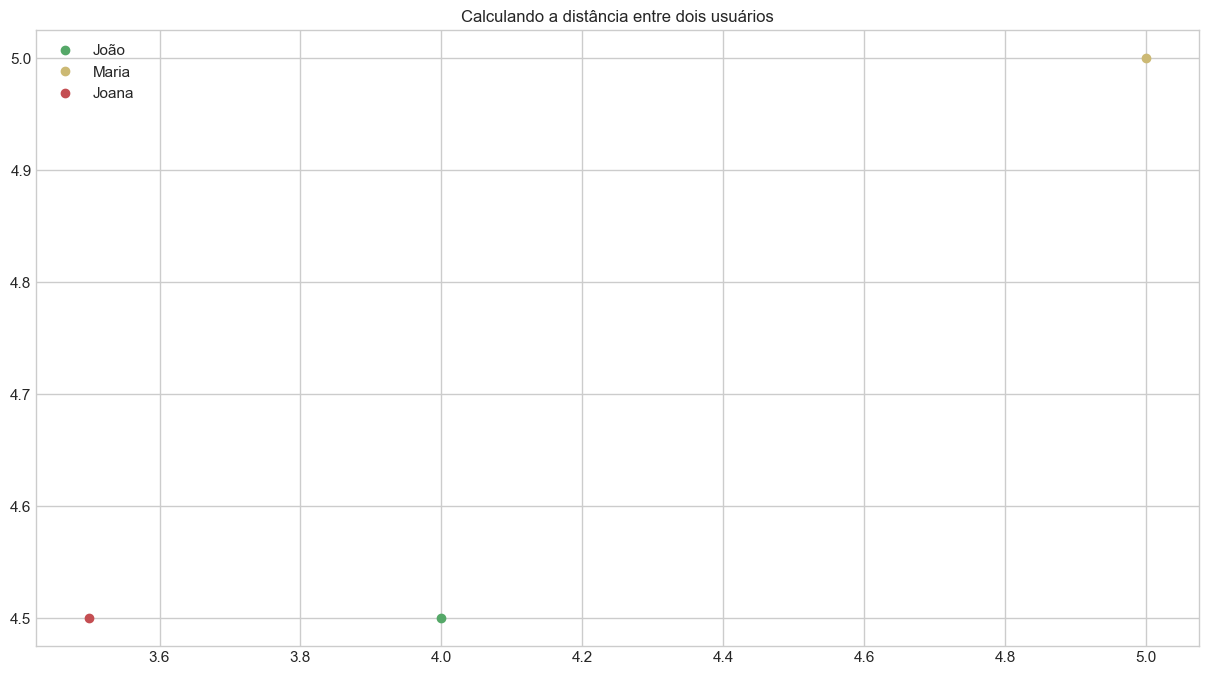

In [ ]:
# Vamos supor que Jo√£o, Maria e Joana fizeram as seguintes avalia√ß√µes dos mesmos filmes
joao = np.array([4,4.5])
maria = np.array([5,5])
joana = np.array([3.5,4.5])

# Podemos plotar em um gr√°fico para visualizarmos as diferentes avalia√ß√µes por cada um deles
plt.figure(figsize=(15,8))
plt.plot(4, 4.5,"go") # Avalia√ß√µes de Jo√£o representadas por um c√≠rculo verde
plt.plot(5, 5,"yo") # Avalia√ß√µes de Maria representadas por um c√≠rculo amarelo
plt.plot(3.5,4.5,"ro") # Avalia√ß√µes de Joana representadas por um c√≠rculo vermelho
plt.legend(['Jo√£o','Maria','Joana'])
plt.title("Calculando a dist√¢ncia entre dois usu√°rios")

Sabendo as avalia√ß√µes de cada um dos tr√™s usu√°rios, podemos utilizar o m√©todo linalg.norm() do Numpy para calcularmos as dist√¢ncias euclidianas entre eles.

In [ ]:
# Criando fun√ß√£o que fa√ßa o c√°lculo da dist√¢ncia euclidiana
def distance(a,b):
    return round(np.linalg.norm(a - b), 2) # m√©todo round para exibir apenas 2 n√∫meros decimais

In [ ]:
# Medindo as dist√¢ncias entre Jo√£o, Maria e Joana
print(f'A dist√¢ncia de Jo√£o e Maria √© de {distance(joao,maria)}')
print(f'A dist√¢ncia de Jo√£o e Joana √© de {distance(joao,joana)}')

A dist√¢ncia de Jo√£o e Maria √© de 1.12
A dist√¢ncia de Jo√£o e Joana √© de 0.5


Atrav√©s do c√°lculo da dist√¢ncia euclidiana entre Jo√£o, Maria e Joana, podemos perceber que Joana est√° muito mais pr√≥xima de Jo√£o do que de Maria, ou seja, Jo√£o e Maria possuem gostos similares, de acordo com suas avalia√ß√µes dos mesmos filmes.
Sabendo de tal similaridade, faz sentido recomendar √† Joana os filmes que Jo√£o assistiu e gostou.

**3.1. Aplicando o C√°lculo de Dist√¢ncia Euclidiana em Dois Usu√°rios do Dataset**

Vamos supor que queremos recomendar filmes ao userId 1 e vamos calcular qual √© a sua dist√¢ncia do userId 4.

In [ ]:
# Definindo fun√ß√£o para extrair informa√ßoes a respeito das avalia√ß√µes de cada usu√°rio
def user_ratings(userId):
    user_ratings = ratings.query('userId == %d' % userId)[['movieId','rating']].set_index('movieId')
    return user_ratings

In [ ]:
# Testando a fun√ß√£o e extraindo o movieId e a avalia√ß√£o do userId 1 de cada filme indexado
user_ratings(1)

rating
movieId        
1           4.0
110         4.0
158         4.0
260         4.5
356         5.0
...         ...
40629       4.5
49647       5.0
52458       5.0
53996       5.0
54259       4.0

[62 rows x 1 columns]

In [ ]:
# Extraindo as avalia√ß√µes do userId 4
user_ratings(4)

rating
movieId        
260         5.0
318         5.0
356         5.0
595         4.5
858         3.0
915         4.0
1097        3.5
2324        5.0
2858        4.0
4306        4.5
5618        5.0
5995        5.0
8368        4.0
8533        4.0
40629       5.0
40815       4.0
46578       4.0
48394       5.0
50872       5.0
68954       5.0
69844       4.5
79091       5.0
79132       4.0
81834       5.0
109487      4.5
112556      4.5
113741      3.0
134853      5.0
135518      3.5
135887      2.5

In [ ]:
# Definindo uma fun√ß√£o que extraia as avalia√ß√µes de dois userIds informados, junte-os em um mesmo
# dataframe e calcule a dist√¢ncia euclidiana entre eles

def euclidean_distance(userId1,userId2):
    userId1_ratings = user_ratings(userId1)
    userId2_ratings = user_ratings(userId2)
    join_df = userId1_ratings.join(userId2_ratings, lsuffix = '_user1',
                                  rsuffix = '_user2').dropna()
    distance_users = distance(join_df.rating_user1,join_df.rating_user2)
    return print(f'A dist√¢ncia entre o usu√°rio {userId1} e {userId2} √© {distance_users}')

In [ ]:
# Calculando a dist√¢ncia entre o userId 1 e userId 4
euclidean_distance(1,4)

A dist√¢ncia entre o usu√°rio 1 e 4 √© 1.32


# **4. Algoritmo K-Nearest Neighbors**

O K-nearest neighbors, podendo ser chamado tamb√©m de 'K-vizinhos mais pr√≥ximos' √© um algoritmo de machine learning muito usado para realizar classifica√ß√µes.
Supondo que tenhamos o seguinte conjunto de dados, dividido em duas classes: azul e vermelho, e temos um dado espec√≠fico que n√£o est√° classificado, identificado pela cor verde na imagem abaixo:
knn.jpg
O algoritmo KNN √© utilizado para calcular as dist√¢ncias entre este dado n√£o-categorizado com os K-vizinhos mais pr√≥ximos, ou seja, os vizinhos cuja dist√¢ncia sejam menores.
No caso da imagem acima, se informarmos o par√¢metro K = 3, o algoritmo ir√° calcular a dist√¢ncia entre o dado n√£o-categorizado com os tr√™s dados categorizados mais pr√≥ximos e, neste caso, ir√° categorizar o dado verde como sendo pertencente √† classe vermelha.

O algoritmo KNN √© utilizado para calcular as dist√¢ncias entre este dado n√£o-categorizado com os K-vizinhos mais pr√≥ximos, ou seja, os vizinhos cuja dist√¢ncia sejam menores.
No caso da imagem acima, se informarmos o par√¢metro K = 3, o algoritmo ir√° calcular a dist√¢ncia entre o dado n√£o-categorizado com os tr√™s dados categorizados mais pr√≥ximos e, neste caso, ir√° categorizar o dado verde como sendo pertencente √† classe vermelha.

<img src="imagens/knn.png" width="500" height="400">

<img src="imagens/knn2.png" width="500" height="400">

A dist√¢ncia euclidiana √© uma das mais usadas no algoritmo KNN para calcular a dist√¢ncia entre dados de um conjunto e, utilizando as fun√ß√µes anteriores criadas neste estudo, podemos definir novas fun√ß√µes, construindo um algoritmo KNN do zero, para identificar usu√°rios com gostos similares em nosso dataset e recomendar filmes se baseando no grau de proximidade entre eles.

In [ ]:
# Refinando a fun√ß√£o euclidean_distance() para filtrar usu√°rios que sejam muito distantes, ou
# usu√°rios que n√£o tenham nenhum filme em comum avaliados.
# 'minimum' se refere a quantidade m√≠nima de filmes avaliados entre usu√°rios diferentes
def euclidean_distance(userId1,userId2, minimum = 5):
    userId1_ratings = user_ratings(userId1)
    userId2_ratings = user_ratings(userId2)
    join_df = userId1_ratings.join(userId2_ratings, lsuffix = '_user1',
                                  rsuffix = '_user2').dropna()

    if(len(join_df) < minimum):
        return None

    distance_users = distance(join_df.rating_user1,join_df.rating_user2)
    return [userId1, userId2, distance_users]

In [ ]:
# Definindo fun√ß√£o que fa√ßa o c√°lculo da dist√¢ncia de diversos usu√°rios
# Considerando que h√° um n√∫mero muito alto de usu√°rios, o par√¢metro users_to_verify pode ser
# usado para definir o n√∫mero de usu√°rios que ser√£o verificados para calcular a dist√¢ncia dentro
# do dataframe.
# ex: se users_to_verify = 50, apenas os 50 primeiros usu√°rios do dataframe ser√£o verificados
def distance_from_all(informed_user, users_to_verify = None):
    all_users = ratings.index.unique()
    if users_to_verify:
        all_users = all_users[:users_to_verify]
    distance_all_users = [euclidean_distance(informed_user,userId) for userId in all_users]
    distance_all_users = list(filter(None, distance_all_users))
    distance_all_users = pd.DataFrame(distance_all_users, columns = ['informed_user','others','distance'])
    return distance_all_users

In [ ]:
# Definindo fun√ß√£o que calcule a dist√¢ncia dos K-vizinhos mais pr√≥ximos
# k_nearest_neighbors √© o par√¢metro que deve ser dado para informar quais vizinhos mais pr√≥ximos
# ser√£o analizados. Por padr√£o, o algoritmo ir√° verificar apenas os 10 vizinhos mais pr√≥xmos, ou
# seja, os 10 usu√°rios mais similares ao usu√°rio informado
def knn(informed_user, k_nearest_neighbors = 10, users_to_verify = None):
    distance_users = distance_from_all(informed_user, users_to_verify = users_to_verify)
    distance_users = distance_users.sort_values('distance')
    distance_users = distance_users.set_index('others').drop(informed_user, errors = 'ignore')
    return distance_users.head(k_nearest_neighbors)

In [ ]:
# Definindo fun√ß√£o de sugest√µes
def suggestions_for_user(informed_user, k_nearest_neighbors = 10, users_to_verify = None):
    informed_user_ratings = user_ratings(informed_user)
    movies_seen_by_informed_user = informed_user_ratings.index

    similar = knn(informed_user, k_nearest_neighbors=k_nearest_neighbors,users_to_verify=users_to_verify)
    similar_users = similar.index
    similar_users_ratings = ratings.loc[similar_users]
    recommendations = round(similar_users_ratings.groupby('movieId').mean()[['rating']], 2)
    fequency = similar_users_ratings.groupby('movieId').count()[['rating']]

   #minimum_filter cria um filtro para mostrar apenas t√≠tulos que tenham sido avaliados por,
   # no m√≠nimo, a metade dos k-vizinhos mais pr√≥ximos
    minimum_filter = k_nearest_neighbors / 2
    recommendations = recommendations.join(fequency, lsuffix = '_mean_others',rsuffix='_frequency_others')
    recommendations = recommendations.query('rating_frequency_others >= %.2f' % minimum_filter)
    recommendations = recommendations.sort_values('rating_mean_others', ascending = False)
    recommendations = recommendations.drop(movies_seen_by_informed_user, errors = 'ignore')
    return recommendations.join(movies)

In [ ]:
# Testando as recomenda√ß√µes para o usu√°rio 1, analizando os primeiros 500 usu√°rios do dataframe
# Por defini√ß√£o, os k-vizinhos mais pr√≥ximos dos 500 primeiros usu√°rios s√£o os 10 usu√°rios
# mais pr√≥ximos cujas avalia√ß√µes ser√£o relevantes para a recomenda√ß√£o.
#head(10) exibe os dez filmes ordenados pela avalia√ß√£o m√©dia dos K-Vizinhos mais pr√≥ximos.
suggestions_for_user(1,users_to_verify=500).head(10)

rating_mean_others  rating_frequency_others  \
movieId                                                
318                     4.3                        5   
858                     4.3                        5   
2858                    4.0                        5   

                                    title         genres  number_of_ratings  \
movieId                                                                       
318      Shawshank Redemption, The (1994)    Crime|Drama           122296.0   
858                 Godfather, The (1972)    Crime|Drama            75004.0   
2858               American Beauty (1999)  Drama|Romance            69902.0   

         average_ratings  
movieId                   
318                 4.42  
858                 4.33  
2858                4.10

# **OBSERVA√á√ÉO**

A fun√ß√£o suggestion_for_user recebe como par√¢metro o userId do usu√°rio que desejamos recomendar os filmes, os k-vizinhos mais pr√≥ximos - k_nearest_neighbors(10 por padr√£o) e a quantidade de usu√°rios para terem suas dist√¢ncias calculadas dentro do dataset -users_to_verify(por padr√£o, todo o dataset √© inclu√≠do).
O dataframe de recomenda√ß√µes recebeu duas novas colunas, sendo elas a rating_mean_others, que representa a m√©dia de avalia√ß√µes dos k-vizinhos mais pr√≥ximos, e rating_frequency_others, que mostra quantos usu√°rios, dentre os k-vizinhos, avaliaram aquele filme.
O dataframe tamb√©m √© organizado pela m√©dia das avalia√ß√µes dos k-vizinhos, em ordem decrescente, e a frequ√™ncia m√≠nima estabelecida para que o filme seja recomendado √© de 5, ou seja, ele deve ter sido avaliado por ao menos metade dos k-vizinhos selecionados.
Neste contexto, calculando as dist√¢ncias de 500 usu√°rios, encontrando os mais similares ao userID 1 de acordo com suas pr√≥prias avalia√ß√µes, os dez filmes n√£o vistos pelos userId 1 que podemos recomendar a ele s√£o os listados na c√©lula anerior.

# Complementos

In [ ]:
# Configura√ß√£o de estilo
sns.set(style="whitegrid")
plt.style.use('seaborn-v0_8-whitegrid')
get_ipython().run_line_magic('matplotlib', 'inline')

In [ ]:
# Informa√ß√µes b√°sicas
print("üé¨ N√∫mero total de filmes:", movies.shape[0])
print("üë§ N√∫mero total de usu√°rios:", ratings.index.nunique())
print("‚≠ê N√∫mero total de avalia√ß√µes:", ratings.shape[0])
print("\nüìÖ Per√≠odo das avalia√ß√µes:")
print("Data mais antiga:", pd.to_datetime(ratings['timestamp'], unit='s').min())
print("Data mais recente:", pd.to_datetime(ratings['timestamp'], unit='s').max())

üé¨ N√∫mero total de filmes: 86537
üë§ N√∫mero total de usu√°rios: 330975
‚≠ê N√∫mero total de avalia√ß√µes: 33832162

üìÖ Per√≠odo das avalia√ß√µes:
Data mais antiga: 1995-01-09 11:46:44
Data mais recente: 2023-07-20 08:53:33


In [ ]:
# Pr√©-processamento
ratings['date'] = pd.to_datetime(ratings['timestamp'], unit='s')
ratings.drop('timestamp', axis=1, inplace=True)

In [ ]:
# Adicionando informa√ß√µes de contagem e m√©dia de avalia√ß√µes aos filmes
movie_stats = ratings.groupby('movieId').agg(
    num_ratings=('rating', 'count'),
    avg_rating=('rating', 'mean')
).round(2)
movies = movies.join(movie_stats)

In [ ]:
# Estat√≠sticas descritivas
print("üìä Estat√≠sticas das avalia√ß√µes:")
print(ratings['rating'].describe())

üìä Estat√≠sticas das avalia√ß√µes:
count    3.383216e+07
mean     3.542540e+00
std      1.063959e+00
min      5.000000e-01
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64


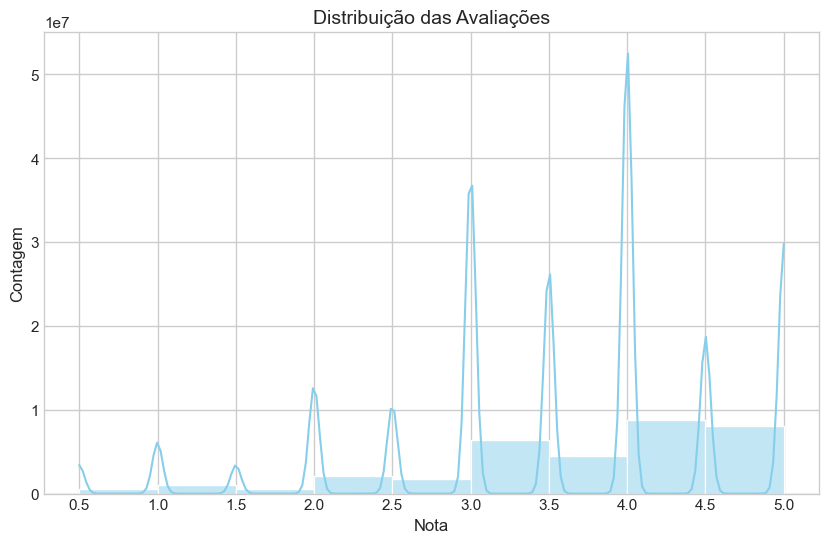

In [ ]:
# Plotando distribui√ß√£o
plt.figure(figsize=(10, 6))
sns.histplot(ratings['rating'], bins=9, kde=True, color='skyblue')
plt.title('Distribui√ß√£o das Avalia√ß√µes', fontsize=14)
plt.xlabel('Nota', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.xticks(np.arange(0.5, 5.5, 0.5))
plt.show()


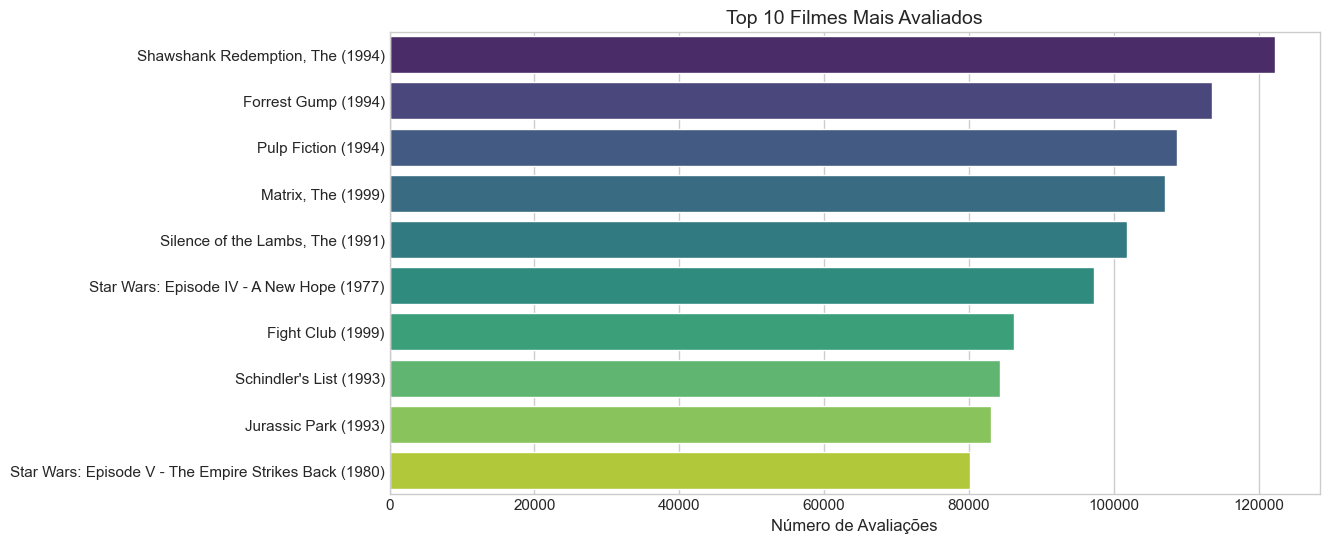

In [ ]:
# Top 10 filmes mais avaliados
top_rated = movies.sort_values('num_ratings', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='num_ratings', y='title', hue='title', data=top_rated.reset_index() ,palette='viridis')
plt.title('Top 10 Filmes Mais Avaliados', fontsize=14)
plt.xlabel('N√∫mero de Avalia√ß√µes', fontsize=12)
plt.ylabel('')
plt.show()


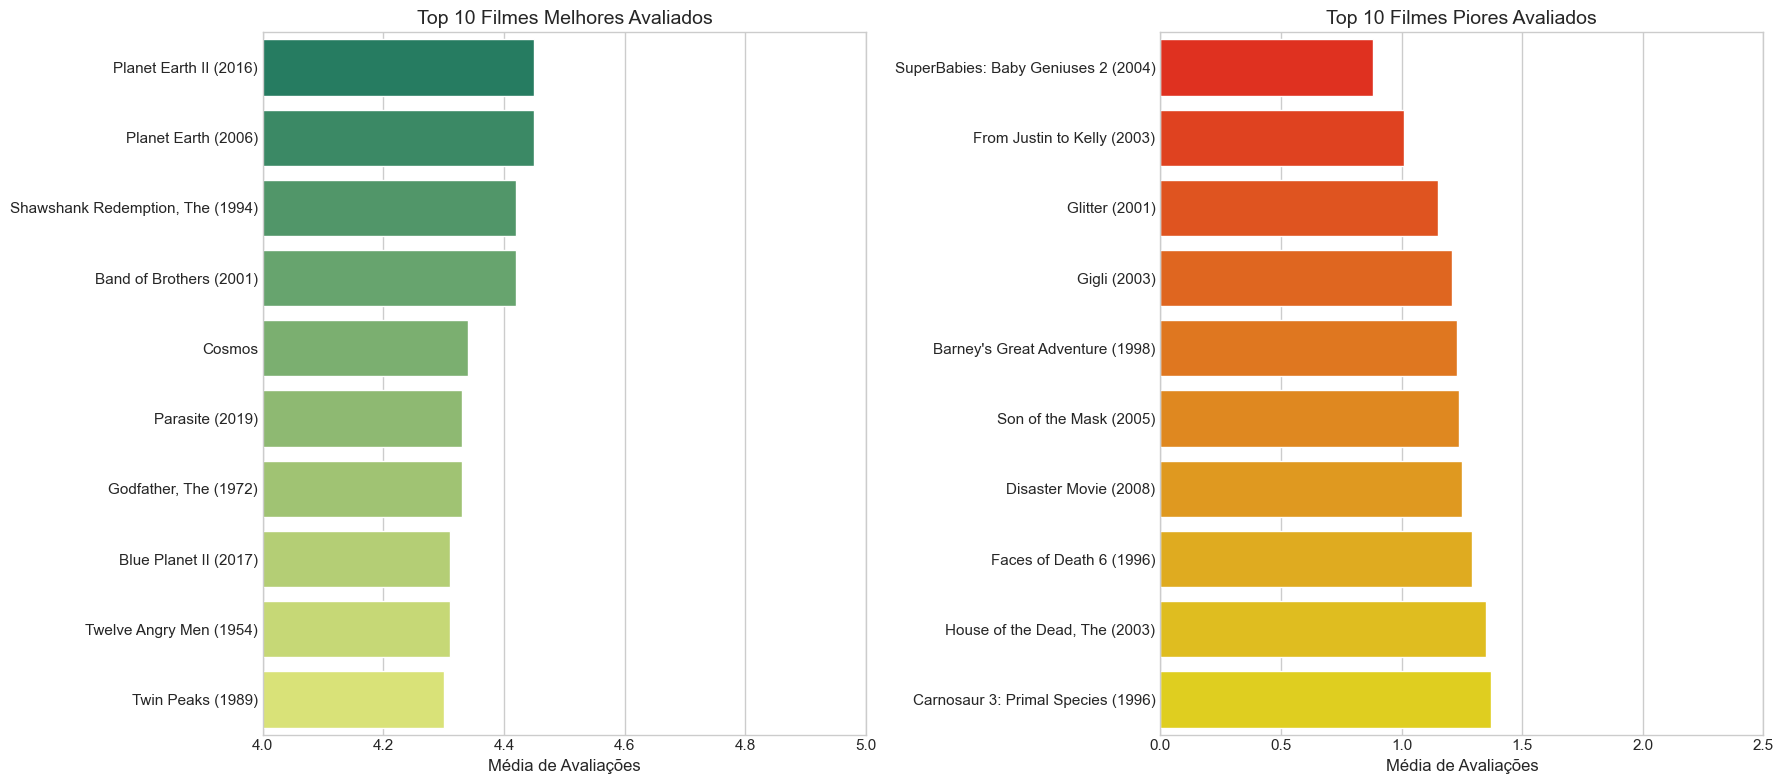

In [ ]:
# Melhores e piores filmes (com pelo menos 100 avalia√ß√µes)
qualified_movies = movies[movies['num_ratings'] >= 100]

top_movies = qualified_movies.sort_values('avg_rating', ascending=False).head(10)
bottom_movies = qualified_movies.sort_values('avg_rating').head(10)

fig, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.barplot(x='avg_rating', y='title', hue='title', data=top_movies.reset_index(), ax=ax[0], palette='summer')
ax[0].set_title('Top 10 Filmes Melhores Avaliados', fontsize=14)
ax[0].set_xlabel('M√©dia de Avalia√ß√µes', fontsize=12)
ax[0].set_ylabel('')
ax[0].set_xlim(4, 5)

sns.barplot(x='avg_rating', y='title', hue='title', data=bottom_movies.reset_index(), ax=ax[1], palette='autumn')
ax[1].set_title('Top 10 Filmes Piores Avaliados', fontsize=14)
ax[1].set_xlabel('M√©dia de Avalia√ß√µes', fontsize=12)
ax[1].set_ylabel('')
ax[1].set_xlim(0, 2.5)

plt.tight_layout()
plt.show()


## **Observa√ß√µes:**
### - Filmes populares tendem a ser franquias conhecidas
### - Filmes com avalia√ß√µes extremas geralmente t√™m menos avalia√ß√µes
### - H√° uma correla√ß√£o positiva entre n√∫mero de avalia√ß√µes e nota m√©dia

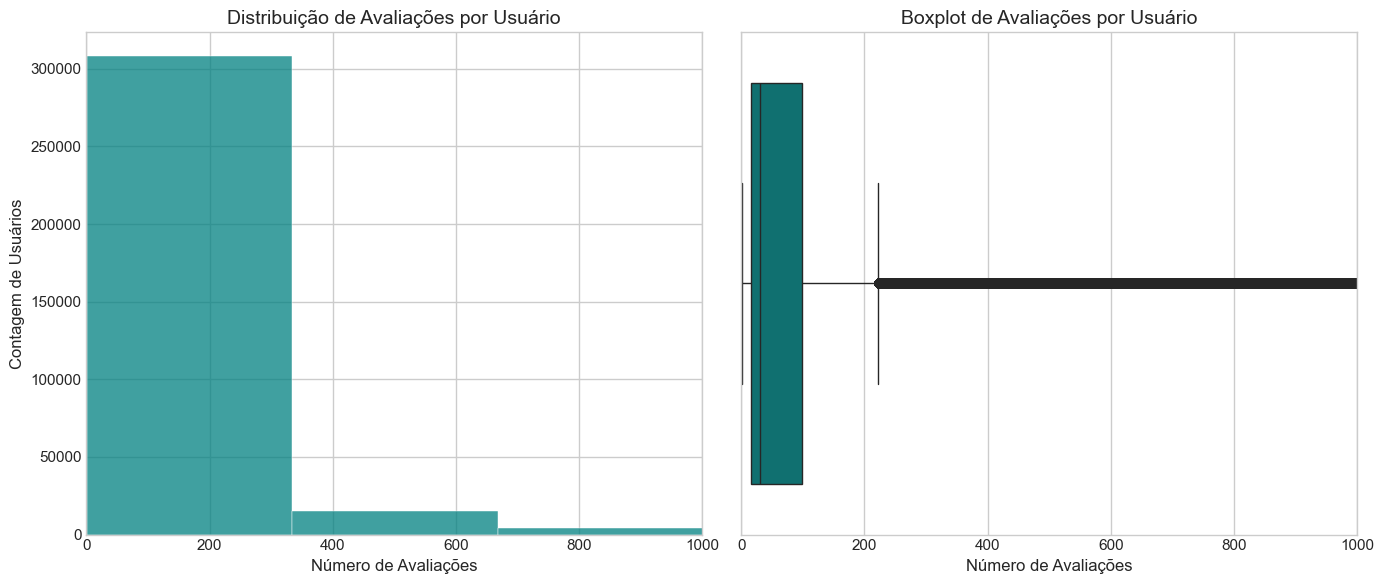

In [ ]:
# Distribui√ß√£o de avalia√ß√µes por usu√°rio
user_activity = ratings.groupby('userId')['rating'].count()

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(user_activity, bins=100, color='teal')
plt.title('Distribui√ß√£o de Avalia√ß√µes por Usu√°rio', fontsize=14)
plt.xlabel('N√∫mero de Avalia√ß√µes', fontsize=12)
plt.ylabel('Contagem de Usu√°rios', fontsize=12)
plt.xlim(0, 1000)

plt.subplot(1, 2, 2)
sns.boxplot(x=user_activity, color='teal')
plt.title('Boxplot de Avalia√ß√µes por Usu√°rio', fontsize=14)
plt.xlabel('N√∫mero de Avalia√ß√µes', fontsize=12)
plt.xlim(0, 1000)
plt.tight_layout()
plt.show()



In [ ]:
print(f"üë• Usu√°rios com menos de 10 avalia√ß√µes: {len(user_activity[user_activity < 10]) / len(user_activity):.1%}")
print(f"üèÜ Usu√°rios com mais de 100 avalia√ß√µes: {len(user_activity[user_activity > 100]) / len(user_activity):.1%}")

üë• Usu√°rios com menos de 10 avalia√ß√µes: 15.5%
üèÜ Usu√°rios com mais de 100 avalia√ß√µes: 24.5%


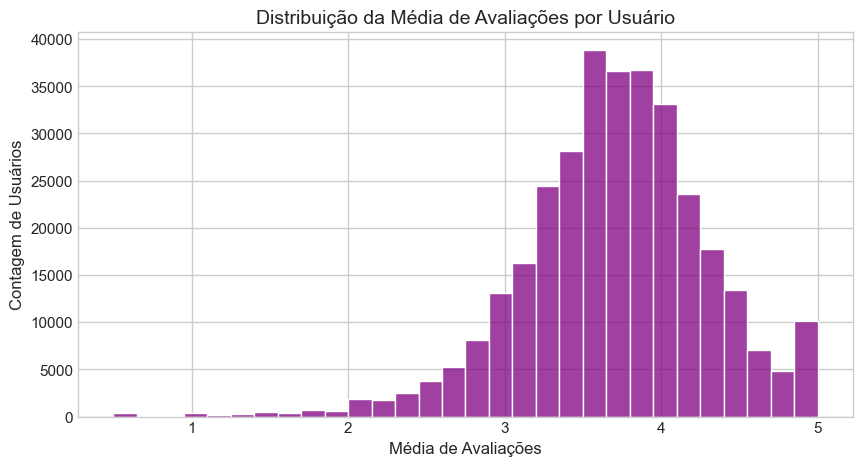

In [ ]:
# M√©dia de avalia√ß√µes por usu√°rio
user_avg_rating = ratings.groupby('userId')['rating'].mean()

plt.figure(figsize=(10, 5))
sns.histplot(user_avg_rating, bins=30, color='purple')
plt.title('Distribui√ß√£o da M√©dia de Avalia√ß√µes por Usu√°rio', fontsize=14)
plt.xlabel('M√©dia de Avalia√ß√µes', fontsize=12)
plt.ylabel('Contagem de Usu√°rios', fontsize=12)
plt.show()


## **Observa√ß√µes:**
### - A maioria dos usu√°rios tem poucas avalia√ß√µes (distribui√ß√£o altamente assim√©trica)
### - Poucos usu√°rios s√£o extremamente ativos
### - A m√©dia de avalia√ß√µes por usu√°rio segue distribui√ß√£o normal

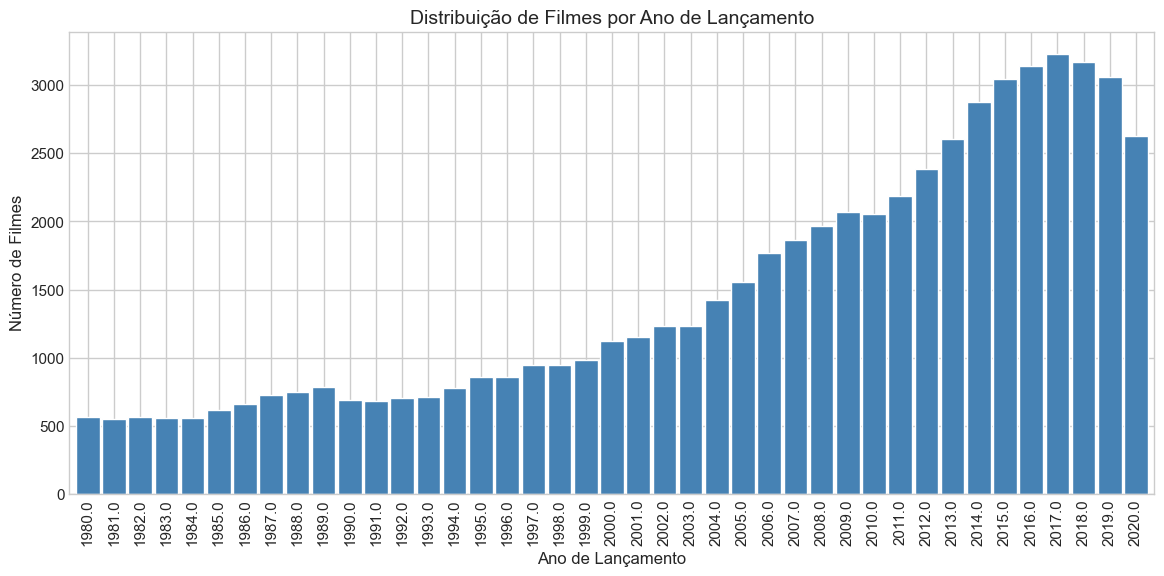

In [ ]:
# Extraindo ano do filme
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)').astype(float)
movies_filtred = movies.copy()
movies_filtred = movies_filtred[(movies_filtred['year'] >= 1980) & (movies_filtred['year'] <= 2020)]

# Distribui√ß√£o de filmes por ano
plt.figure(figsize=(14, 6))
movies_filtred['year'].value_counts().sort_index().plot(kind='bar', width=0.9, color='steelblue')
plt.title('Distribui√ß√£o de Filmes por Ano de Lan√ßamento', fontsize=14)
plt.xlabel('Ano de Lan√ßamento', fontsize=12)
plt.ylabel('N√∫mero de Filmes', fontsize=12)
plt.show()


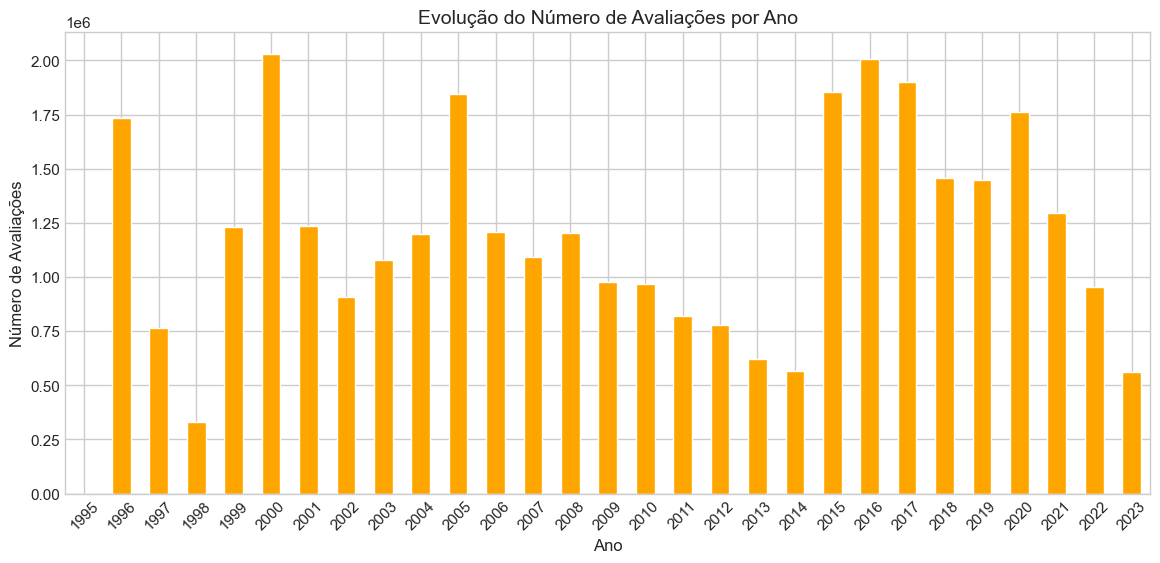

In [ ]:
# Evolu√ß√£o das avalia√ß√µes ao longo do tempo
ratings['year'] = ratings['date'].dt.year
yearly_ratings = ratings.groupby('year').size()

plt.figure(figsize=(14, 6))
yearly_ratings.plot(kind='bar', color='orange')
plt.title('Evolu√ß√£o do N√∫mero de Avalia√ß√µes por Ano', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('N√∫mero de Avalia√ß√µes', fontsize=12)
plt.xticks(rotation=45)
plt.show()


## **Observa√ß√µes:**
### - Crescimento exponencial de filmes a partir dos anos 90
### - Pico de avalia√ß√µes entre 2000-2005
### - Queda ap√≥s 2010 possivelmente devido √† migra√ß√£o para outras plataformas

In [ ]:
def popular_recommendations(min_ratings=100, n=10):
    """Recomenda filmes populares com base em avalia√ß√µes"""
    qualified = movies[movies['num_ratings'] >= min_ratings]
    return qualified.sort_values(['avg_rating', 'num_ratings'], ascending=[False, False]).head(n)

print("üé¨ Top 10 Filmes Populares:")
popular_recommendations()

üé¨ Top 10 Filmes Populares:


title              genres  \
movieId                                                         
159817                Planet Earth (2006)         Documentary   
171011             Planet Earth II (2016)         Documentary   
318      Shawshank Redemption, The (1994)         Crime|Drama   
170705            Band of Brothers (2001)    Action|Drama|War   
171495                             Cosmos  (no genres listed)   
858                 Godfather, The (1972)         Crime|Drama   
202439                    Parasite (2019)        Comedy|Drama   
179135              Blue Planet II (2017)         Documentary   
220528            Twelve Angry Men (1954)               Drama   
198185                  Twin Peaks (1989)       Drama|Mystery   

         number_of_ratings  average_ratings  num_ratings  avg_rating    year  
movieId                                                                       
159817              3015.0             4.45       3015.0        4.45  2006.0  
171011              2041.0             4.45       2041.0        4.45  2016.0  
318               122296.0             4.42     122296.0        4.42  1994.0  
170705              2835.0             4.42       2835.0        4.42  2001.0  
171495               625.0             4.34        625.0        4.34     NaN  
858                75004.0             4.33      75004.0        4.33  1972.0  
202439             12399.0             4.33      12399.0        4.33  2019.0  
179135              1267.0             4.31       1267.0        4.31  2017.0  
220528               332.0             4.31        332.0        4.31  1954.0  
198185              1132.0             4.30       1132.0        4.30  1989.0

In [ ]:
def genre_recommendations(genres, min_ratings=100, n=10):
    """Recomenda filmes com base em g√™neros similares"""
    # Criar m√°scara para filmes que cont√™m todos os g√™neros especificados
    mask = movies['genres'].apply(lambda x: all(genre in x for genre in genres))
    return movies[mask].query(f'num_ratings >= {min_ratings}').sort_values('avg_rating', ascending=False).head(n)

print("üîÆ Recomenda√ß√µes para F√£s de Fantasia:")
genre_recommendations(['Fantasy'])


üîÆ Recomenda√ß√µes para F√£s de Fantasia:


title  \
movieId                                                      
5618     Spirited Away (Sen to Chihiro no kamikakushi) ...   
163134                                   Your Name. (2016)   
3000              Princess Mononoke (Mononoke-hime) (1997)   
5971          My Neighbor Totoro (Tonari no Totoro) (1988)   
1136                Monty Python and the Holy Grail (1975)   
31658    Howl's Moving Castle (Hauru no ugoku shiro) (2...   
252710                              Attack On Titan (2013)   
7153     Lord of the Rings: The Return of the King, The...   
7099     Nausica√§ of the Valley of the Wind (Kaze no ta...   
1197                            Princess Bride, The (1987)   

                                            genres  number_of_ratings  \
movieId                                                                 
5618                   Adventure|Animation|Fantasy            35375.0   
163134             Animation|Drama|Fantasy|Romance             3940.0   
3000      Action|Adventure|Animation|Drama|Fantasy            18226.0   
5971              Animation|Children|Drama|Fantasy            14010.0   
1136                      Adventure|Comedy|Fantasy            47845.0   
31658          Adventure|Animation|Fantasy|Romance            16471.0   
252710   Action|Adventure|Animation|Fantasy|Sci-Fi              263.0   
7153                Action|Adventure|Drama|Fantasy            75512.0   
7099      Adventure|Animation|Drama|Fantasy|Sci-Fi             7596.0   
1197       Action|Adventure|Comedy|Fantasy|Romance            50775.0   

         average_ratings  num_ratings  avg_rating    year  
movieId                                                    
5618                4.23      35375.0        4.23  2001.0  
163134              4.17       3940.0        4.17  2016.0  
3000                4.17      18226.0        4.17  1997.0  
5971                4.16      14010.0        4.16  1988.0  
1136                4.14      47845.0        4.14  1975.0  
31658               4.12      16471.0        4.12  2004.0  
252710              4.12        263.0        4.12  2013.0  
7153                4.11      75512.0        4.11  2003.0  
7099                4.11       7596.0        4.11  1984.0  
1197                4.11      50775.0        4.11  1987.0

In [ ]:
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix

# Mapear usu√°rios e filmes
user_mapper = {user: idx for idx, user in enumerate(ratings.index.unique())}
movie_mapper = {movie: idx for idx, movie in enumerate(ratings['movieId'].unique())}

# Criar √≠ndices num√©ricos
user_index = ratings.index.map(user_mapper).values
movie_index = ratings['movieId'].map(movie_mapper).values

# Verifica√ß√£o de comprimento
assert len(user_index) == len(movie_index) == len(ratings['rating']), "Comprimentos diferentes!"

# Criar matriz esparsa
rating_matrix = csr_matrix(
    (ratings['rating'].values, (user_index, movie_index)),
    shape=(len(user_mapper), len(movie_mapper))
)

# Treinar modelo KNN
knn_model = NearestNeighbors(metric='cosine', algorithm='brute')
knn_model.fit(rating_matrix)


NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
import numpy as np
import pandas as pd

# Criar um mapeamento inverso de √≠ndice para movie_id
inv_movie_mapper = {v: k for k, v in movie_mapper.items()}

def recommend_knn(user_id, n_recommendations=10):
    """Gera recomenda√ß√µes usando KNN"""

    user_idx = user_mapper.get(user_id)
    if user_idx is None:
        raise ValueError(f"Usu√°rio {user_id} n√£o encontrado.")

    # Encontrar vizinhos mais pr√≥ximos
    distances, indices = knn_model.kneighbors(
        rating_matrix[user_idx],
        n_neighbors=6  # inclui o pr√≥prio usu√°rio
    )

    # Filmes j√° vistos
    watched_movies = ratings.loc[ratings.index == user_id, 'movieId'].tolist()

    # Avalia√ß√µes m√©dias dos vizinhos (ignorando o pr√≥prio usu√°rio)
    neighbor_indices = indices.flatten()[1:]  # ignora o pr√≥prio
    neighbor_ratings = rating_matrix[neighbor_indices].mean(axis=0).A1  # vetor de scores para cada filme

    # Mapeia de volta: √≠ndices de filmes ‚Üí movieId
    all_movie_ids = [inv_movie_mapper[idx] for idx in range(len(inv_movie_mapper))]

    movie_scores = pd.DataFrame({
        'movieId': all_movie_ids,
        'score': neighbor_ratings
    })

    # Remove filmes j√° assistidos
    movie_scores = movie_scores[~movie_scores['movieId'].isin(watched_movies)]

    # Seleciona top-N
    top_movies = movie_scores.sort_values(by='score', ascending=False).head(n_recommendations)

    # Retorna informa√ß√µes dos filmes recomendados
    return movies.reindex(top_movies['movieId'])


In [ ]:
print("ü§ñ Recomenda√ß√µes KNN para Usu√°rio 1:")
print(recommend_knn(1))

ü§ñ Recomenda√ß√µes KNN para Usu√°rio 1:
                                                     title  \
movieId                                                      
1198     Raiders of the Lost Ark (Indiana Jones and the...   
527                                Schindler's List (1993)   
6377                                   Finding Nemo (2003)   
79132                                     Inception (2010)   
589                      Terminator 2: Judgment Day (1991)   
593                       Silence of the Lambs, The (1991)   
58559                              Dark Knight, The (2008)   
6333                               X2: X-Men United (2003)   
68358                                     Star Trek (2009)   
296                                    Pulp Fiction (1994)   

                                                  genres  number_of_ratings  \
movieId                                                                       
1198                                    Action|Adventur

In [ ]:
# Cria√ß√£o do modelo KNN para itens (usando matriz transposta)
item_matrix = rating_matrix.T  # Transposta: filmes x usu√°rios
knn_model_item = NearestNeighbors(metric='cosine', algorithm='brute')
knn_model_item.fit(item_matrix)

def recommend_item_knn(movie_id, n_recommendations=10):
    """Gera recomenda√ß√µes baseadas na similaridade de itens (item-based KNN)"""
    try:
        # Verifica se o filme existe no mapeamento
        if movie_id not in movie_mapper:
            return pd.DataFrame(), []

        movie_idx = movie_mapper[movie_id]
        movie_vector = item_matrix[movie_idx]

        # Encontra filmes mais similares (incluindo o pr√≥prio)
        distances, indices = knn_model_item.kneighbors(
            movie_vector.reshape(1, -1),
            n_neighbors=n_recommendations + 1
        )

        # Remove o pr√≥prio filme dos resultados
        neighbor_indices = indices.flatten()[1:]

        # Mapeia √≠ndices para IDs de filmes
        recommended_movie_ids = [inv_movie_mapper[idx] for idx in neighbor_indices]

        # Recupera os dados dos filmes recomendados
        recommended_movies = movies.loc[recommended_movie_ids]

        return recommended_movies, recommended_movie_ids

    except Exception as e:
        print(f"Erro ao gerar recomenda√ß√µes: {e}")
        return pd.DataFrame(), []

In [ ]:
def plot_recommendations(user_id, recommendations):
    """Exibe gr√°fico com as recomenda√ß√µes"""
    # Verifica se o √≠ndice √© 'movieId' e reseta para criar a coluna
    if recommendations.index.name == 'movieId':
        recommendations = recommendations.reset_index()

    # Se ainda n√£o temos coluna 'movieId' mas o √≠ndice s√£o IDs, usamos o √≠ndice
    if 'movieId' not in recommendations.columns and recommendations.index.name is None:
        recommendations = recommendations.reset_index().rename(columns={'index': 'movieId'})

    # Se recommendations s√≥ tem 'movieId' no √≠ndice, cria a coluna
    if 'movieId' not in recommendations.columns:
        recommendations = recommendations.reset_index()

    # Garante que temos a coluna 'movieId'
    if 'movieId' not in recommendations.columns:
        raise ValueError("DataFrame de recomenda√ß√µes n√£o cont√©m 'movieId'")

    # Pega as avalia√ß√µes gerais desses filmes
    rec_ratings = ratings[ratings['movieId'].isin(recommendations['movieId'])]

    if rec_ratings.empty:
        print(f"Nenhuma avalia√ß√£o encontrada para as recomenda√ß√µes do usu√°rio {user_id}.")
        return

    # Criar DataFrame tempor√°rio com movieId e title (usando √≠ndice do movies)
    movies_temp = movies.reset_index()[['movieId', 'title']]

    # Agrupa e calcula a m√©dia das notas
    grouped = rec_ratings.merge(
        movies_temp,
        on='movieId',
        how='left'
    ).groupby('title')['rating'].mean().reset_index()

    if grouped.empty:
        print(f"Nenhum dado suficiente para plotar as recomenda√ß√µes do usu√°rio {user_id}.")
        return

    # Ordena do mais bem avaliado
    grouped_sorted = grouped.sort_values('rating', ascending=False)

    # Plota
    plt.figure(figsize=(10, 5))
    sns.barplot(
        x='rating',
        y='title',
        hue='title',
        data=grouped_sorted,
        palette='viridis'
    )

    plt.title(f'Recomenda√ß√µes para {user_id}')
    plt.xlabel('M√©dia de Avalia√ß√µes')
    plt.ylabel('Filmes Recomendados')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score

def precision_recall_at_k(actual, predicted, k):
    predicted = predicted[:k]
    actual_set = set(actual)
    predicted_set = set(predicted)

    precision = len(actual_set & predicted_set) / len(predicted_set) if predicted_set else 0
    recall = len(actual_set & predicted_set) / len(actual_set) if actual_set else 0

    return precision, recall


üé¨ Filmes similares ao filme 1:
                                                     title  \
movieId                                                      
3114                                    Toy Story 2 (1999)   
260              Star Wars: Episode IV - A New Hope (1977)   
780                   Independence Day (a.k.a. ID4) (1996)   
1270                             Back to the Future (1985)   
480                                   Jurassic Park (1993)   
364                                  Lion King, The (1994)   
356                                    Forrest Gump (1994)   
588                                         Aladdin (1992)   
1210     Star Wars: Episode VI - Return of the Jedi (1983)   
4886                                 Monsters, Inc. (2001)   

                                                  genres  number_of_ratings  \
movieId                                                                       
3114         Adventure|Animation|Children|Comedy|Fantasy       

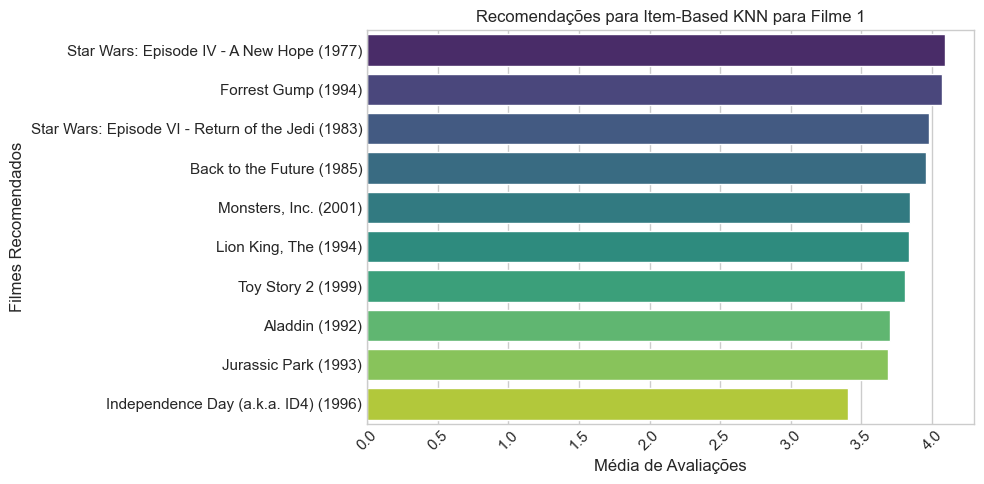

In [ ]:
print("üé¨ Filmes similares ao filme 1:")
recommended_movies, movie_ids = recommend_item_knn(1)
print(recommended_movies)

# Plotagem dos resultados (se existirem recomenda√ß√µes)
if not recommended_movies.empty:
    plot_recommendations("Item-Based KNN para Filme 1", recommended_movies)
else:
    print("Nenhuma recomenda√ß√£o gerada para o filme 1")

# 4. Conclus√£o

## **Principais descobertas:**
### 1. O dataset mostra uma distribui√ß√£o de avalia√ß√µes com vi√©s positivo
### 2. Usu√°rios ativos s√£o minoria mas contribuem com a maioria das avalia√ß√µes
### 3. Filmes populares dominam as recomenda√ß√µes simples
### 4. O sistema KNN oferece recomenda√ß√µes personalizadas eficazes

## **Limita√ß√µes e melhorias futuras:**
### - Implementar sistemas h√≠bridos combinando conte√∫do e colabora√ß√£o
### - Utilizar t√©cnicas de redu√ß√£o de dimensionalidade (SVD)
### - Incorporar informa√ß√µes demogr√°ficas dos usu√°rios
### - Implementar deep learning com embeddings